# Cross Validation and Hyperparameter Optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_boston, load_iris

## Dataset

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


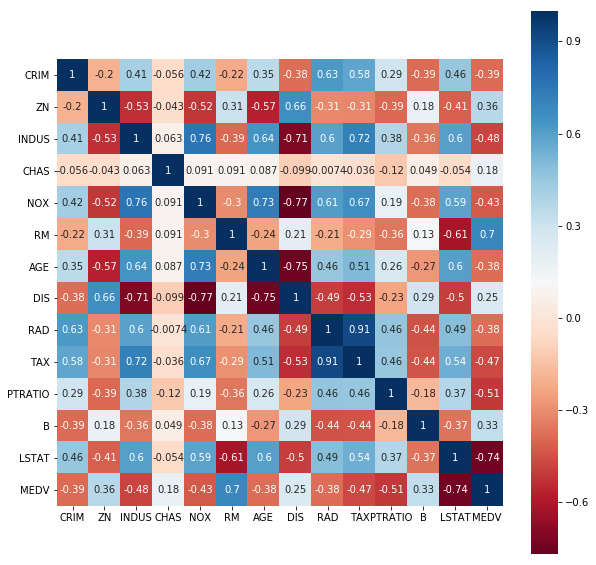

In [5]:
cm = boston_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, square=True, annot=True, ax=ax, cmap='RdBu');

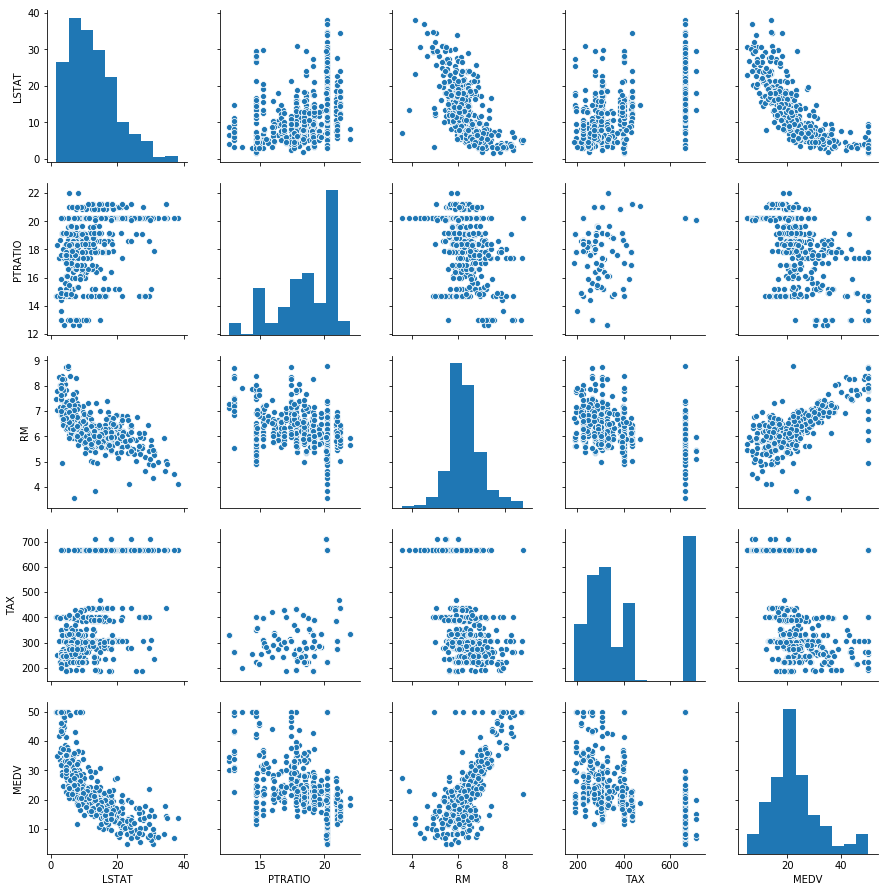

In [6]:
sns.pairplot(boston_df[['LSTAT', 'PTRATIO', 'RM', 'TAX', 'MEDV']]);

### Train Test Split

Train Set
Train MSE :  22.391912761102265
Train R2 Score:  0.7536265594928349
Test Set
Test MSE :  21.270474171128367
Test R2 Score:  0.6896825282689119


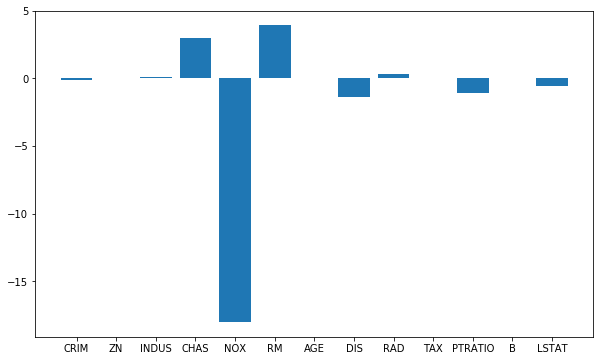

In [30]:
from sklearn.model_selection import train_test_split

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#validation

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print('Train Set')
print('Train MSE : ', train_mse)
print('Train R2 Score: ', train_score)
print('Test Set')
print('Test MSE : ', test_mse)
print('Test R2 Score: ', test_score)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(model.coef_)), height=model.coef_)
ax.set_xticks(range(len(model.coef_)))
ax.set_xticklabels(X_train.columns);

## K-Folds Cross-Validation

<img src='images/kfold.svg'>

In [14]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)

for train, test in kfold.split(X, y):
    print('-------Fold-------')
    print()
    model = LinearRegression()
    model.fit(X.values[train], y.values[train])
    
    y_train_pred = model.predict(X.values[train])
    y_test_pred = model.predict(X.values[test])

    train_score = r2_score(y.values[train], y_train_pred)
    test_score = r2_score(y.values[test], y_test_pred)

    train_mse = mean_squared_error(y.values[train], y_train_pred)
    test_mse = mean_squared_error(y.values[test], y_test_pred)

    print('- Train Set')
    print('Train MSE : ', train_mse)
    print('Train R2 Score: ', train_score)
    print('\n- Test Set')
    print('Test MSE : ', test_mse)
    print('Test R2 Score: ', test_score)

-------Fold-------

- Train Set
Train MSE :  23.07658518008872
Train R2 Score:  0.7209201855503373

- Test Set
Test MSE :  17.8423502543574
Test R2 Score:  0.8045097824492671
-------Fold-------

- Train Set
Train MSE :  19.62818862980289
Train R2 Score:  0.7671093041513142

- Test Set
Test MSE :  32.655990795531544
Test R2 Score:  0.6129413219010514
-------Fold-------

- Train Set
Train MSE :  22.732634330958714
Train R2 Score:  0.7244122085179627

- Test Set
Test MSE :  19.32228966284307
Test R2 Score:  0.7869715237041519
-------Fold-------

- Train Set
Train MSE :  21.353973031440756
Train R2 Score:  0.7562764637393578

- Test Set
Test MSE :  26.519145162610535
Test R2 Score:  0.6131838514915702
-------Fold-------

- Train Set
Train MSE :  21.360749558452202
Train R2 Score:  0.7479879309723831

- Test Set
Test MSE :  25.504552634787053
Test R2 Score:  0.6924996095228477


By default cross_val_score does a Stratified K-Fold Cross Validation.

In [20]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X.values, y.values, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X.values, y.values, cv=5, scoring='r2')
mse = -scores
print('MSE: ', mse)
print('Mean: ', mse.mean())
print('Std: ', mse.std())
print('-'*70)
print('Scores: ', r2_scores)
print('Mean: ', r2_scores.mean())
print('Std: ', r2_scores.std())

MSE:  [12.46030057 26.04862111 33.07413798 80.76237112 33.31360656]
Mean:  37.13180746769911
Std:  23.091945335664157
----------------------------------------------------------------------
Scores:  [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Mean:  0.35327592439587907
Std:  0.3765678393326277


In [31]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X.values, y.values, cv=kfold, scoring='neg_mean_squared_error', )
r2_scores = cross_val_score(model, X.values, y.values, cv=kfold, scoring='r2')
mse = -scores
print('MSE: ', mse)
print('Mean: ', mse.mean())
print('Std: ', mse.std())
print('-'*70)
print('Scores: ', r2_scores)
print('Mean: ', r2_scores.mean())
print('Std: ', r2_scores.std())

MSE:  [36.1620778  19.73936007 19.53379665 16.96935584 28.52523594]
Mean:  24.185965258923982
Std:  7.151936292215164
----------------------------------------------------------------------
Scores:  [0.66984822 0.6362508  0.77860938 0.78596637 0.68646548]
Mean:  0.7114280494517151
Std:  0.06012141844093269


## Stratified K-Fold Cross-Validation

In [25]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['class'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
display(iris_df.shape)
iris_df['class'].value_counts() / iris_df.shape[0]

(150, 5)

2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

In [27]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

X = iris_df.drop('class', axis=1)
y = iris_df['class']

for train, test in skf.split(X, y):
    print('-'*30 + 'Fold' + '-'*30)
    
    print('Train Size:', y[train].shape[0])
    display(y[train].value_counts() / y[train].shape[0])
    
    print('Test Size:', y[test].shape[0])
    display(y[test].value_counts() / y[test].shape[0])

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

------------------------------Fold------------------------------
Train Size: 135


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

Test Size: 15


2    0.333333
1    0.333333
0    0.333333
Name: class, dtype: float64

In [28]:
clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')

scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
acc = scores
print('Accuracy: ', acc)
print('Mean: ', acc.mean())
print('Std: ', acc.std())

Accuracy:  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Mean:  0.9733333333333334
Std:  0.03265986323710904


## Leave One Out

Note: LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1) where n is the number of samples.

In [29]:
from sklearn.model_selection import LeaveOneOut

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']
loo = LeaveOneOut()

model = LinearRegression()
scores = cross_val_score(model, X.values, y.values, cv=loo, scoring='neg_mean_squared_error', )
mse = -scores
print('Mean: ', mse.mean())
print('Std: ', mse.std())

Mean:  23.725745519476074
Std:  65.26874647564769


## Shuffle Split

In [32]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5)

scores = cross_val_score(model, X.values, y.values, cv=ss, scoring='neg_mean_squared_error', )
r2_scores = cross_val_score(model, X.values, y.values, cv=ss, scoring='r2')
mse = -scores
print('MSE: ', mse)
print('Mean: ', mse.mean())
print('Std: ', mse.std())
print('-'*70)
print('Scores: ', r2_scores)
print('Mean: ', r2_scores.mean())
print('Std: ', r2_scores.std())

MSE:  [20.93282101 14.48750964 16.10969516 21.20559921 34.27614939]
Mean:  21.402354882854006
Std:  6.954438749450195
----------------------------------------------------------------------
Scores:  [0.60829511 0.77664478 0.76637582 0.8032516  0.79640386]
Mean:  0.7501942366806061
Std:  0.07217652085400275


## Grid Search CV

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'eta0': [0.001, 0.01, 0.1, 0.5],
               'fit_intercept': [True, False],
               'max_iter': [100, 1000, 10000],
               }]
sgd_reg = SGDRegressor()
grid_search = GridSearchCV(sgd_reg, param_grid, cv=KFold(n_splits=5),
                          scoring='neg_mean_squared_error')

grid_search.fit(X, y)

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'eta0': [0.001, 0.01, 0.1, 0.5], 'fit_intercept': [True, False], 'max_iter': [100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [34]:
grid_search.best_params_

{'eta0': 0.001, 'fit_intercept': True, 'max_iter': 10000}

In [38]:
ridge = Ridge()

param_grid = [{'alpha': [0.01, 0.1, 0.5, 1, 10, 100]}]

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.01, 0.1, 0.5, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
grid_search.best_params_

{'alpha': 100}

In [40]:
grid_search.cv_results_

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.01874933, 0.01250091, 0.01252618, 0.00628071, 0.01562791,
        0.00313406]),
 'std_fit_time': array([0.02296415, 0.00625045, 0.00626335, 0.00769241, 0.00010245,
        0.00626812]),
 'mean_score_time': array([0.00625014, 0.003126  , 0.        , 0.00308542, 0.        ,
        0.        ]),
 'std_score_time': array([0.00765483, 0.006252  , 0.        , 0.00617085, 0.        ,
        0.        ]),
 'param_alpha': masked_array(data=[0.01, 0.1, 0.5, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([-12.44497288, -12.31966805, -11.95053799, -11.7110334 ,
        -11.4217962 , -12.8247449 ]),
 'split1_test_score': array([-25.94477456, -25.19800734, -23.87955061, -23.58316804,
        -24.29446706, -27.27923137]),
 'split2_test_score': array(

In [43]:
clf = LogisticRegression()
param_grid = [{'C': [1000, 100, 10, 5, 1]}]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

X = iris_df.drop('class', axis=1)
y = iris_df['class']
grid_search.fit(X, y)

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1000, 100, 10, 5, 1]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)